<a href="https://colab.research.google.com/github/v370r/projects/blob/master/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
%matplotlib inline
from copy import deepcopy #includes both instance members and the objects pointed to by reference members.
import numpy as np
import seaborn as sns
sns.set() #for plot styling
import matplotlib.pyplot as plt
import pandas as pd

In [68]:
plt.rcParams["figure.figsize"] = (16,9)
plt.style.use("ggplot")

In [69]:
url ="https://raw.githubusercontent.com/coding-blocks-archives/machine-learning-june-2019/master/Dataset/movie_metadata.csv"
data = pd.read_csv(url,)
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [70]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [71]:
data.shape

(5043, 28)

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [73]:
data.describe(include="all")

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,5024,4939,4993.000000,5028.000000,4939.000000,5020.000000,5030,5036.000000,4.159000e+03,5043,5036,5043,5.043000e+03,5043.000000,5020,5030.000000,4890,5043,5022.000000,5031,5038,4740,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
unique,2,2398,NaN,NaN,NaN,NaN,3032,NaN,NaN,914,2097,4917,NaN,NaN,3521,NaN,4760,4919,NaN,47,65,18,NaN,NaN,NaN,NaN,NaN,NaN
top,Color,Steven Spielberg,NaN,NaN,NaN,NaN,Morgan Freeman,NaN,NaN,Drama,Robert De Niro,Halloween,NaN,NaN,John Heard,NaN,based on novel,http://www.imdb.com/title/tt0360717/?ref_=fn_t...,NaN,English,USA,R,NaN,NaN,NaN,NaN,NaN,NaN
freq,4815,26,NaN,NaN,NaN,NaN,20,NaN,NaN,236,49,3,NaN,NaN,8,NaN,4,3,NaN,4704,3807,2118,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,140.194272,107.201074,686.509212,645.009761,NaN,6560.047061,4.846841e+07,NaN,NaN,NaN,8.366816e+04,9699.063851,NaN,1.371173,NaN,NaN,272.770808,NaN,NaN,NaN,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,NaN,NaN,121.601675,25.197441,2813.328607,1665.041728,NaN,15020.759120,6.845299e+07,NaN,NaN,NaN,1.384853e+05,18163.799124,NaN,2.013576,NaN,NaN,377.982886,NaN,NaN,NaN,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,NaN,NaN,1.000000,7.000000,0.000000,0.000000,NaN,0.000000,1.620000e+02,NaN,NaN,NaN,5.000000e+00,0.000000,NaN,0.000000,NaN,NaN,1.000000,NaN,NaN,NaN,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,NaN,NaN,50.000000,93.000000,7.000000,133.000000,NaN,614.000000,5.340988e+06,NaN,NaN,NaN,8.593500e+03,1411.000000,NaN,0.000000,NaN,NaN,65.000000,NaN,NaN,NaN,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,NaN,NaN,110.000000,103.000000,49.000000,371.500000,NaN,988.000000,2.551750e+07,NaN,NaN,NaN,3.435900e+04,3090.000000,NaN,1.000000,NaN,NaN,156.000000,NaN,NaN,NaN,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,NaN,NaN,195.000000,118.000000,194.500000,636.000000,NaN,11000.000000,6.230944e+07,NaN,NaN,NaN,9.630900e+04,13756.500000,NaN,2.000000,NaN,NaN,326.000000,NaN,NaN,NaN,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000


In [74]:
print("Color types",data.groupby("color").size())
print("-"*100)
print("By country",data.groupby("country").size())

Color types color
 Black and White     209
Color               4815
dtype: int64
----------------------------------------------------------------------------------------------------
By country country
Afghanistan                1
Argentina                  4
Aruba                      1
Australia                 55
Bahamas                    1
                        ... 
Turkey                     1
UK                       448
USA                     3807
United Arab Emirates       1
West Germany               3
Length: 65, dtype: int64


In [75]:
df = data.groupby("color").mean()
df.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
color,,,,,,,,,,,,,,,,
Black and White,129.004785,112.253589,1251.941748,392.354067,3925.985646,3.245702e+07,95579.679426,5903.354067,1.411483,353.669856,1.907756e+07,1984.029126,1009.511962,7.227273,1.902157,4626.028708
Color,141.047609,107.042908,663.919423,657.093867,6640.256032,4.902619e+07,83405.573624,9836.873105,1.369561,270.034404,4.075648e+07,2003.248197,1683.981886,6.409533,2.231912,7666.744133


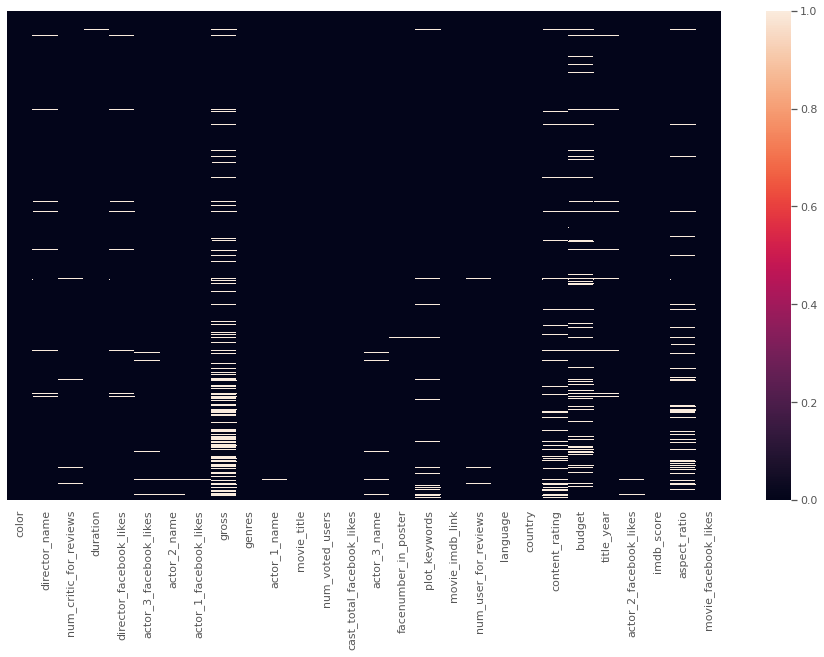

In [76]:
sns.heatmap(data.isnull(),yticklabels=False)

In [77]:
data.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [78]:
df1 = data.iloc[:,4:6]
df1.head()

,director_facebook_likes,actor_3_facebook_likes
0,0.0,855.0
1,563.0,1000.0
2,0.0,161.0
3,22000.0,23000.0
4,131.0,NaN


In [79]:
df1.dropna(inplace=True,how="any",)

In [80]:
df1.head()

,director_facebook_likes,actor_3_facebook_likes
0,0.0,855.0
1,563.0,1000.0
2,0.0,161.0
3,22000.0,23000.0
5,475.0,530.0


In [81]:
df1.shape

(4919, 2)

## With Eleminating Null values

In [82]:
from sklearn.cluster import KMeans

In [83]:
kmeans = KMeans(n_clusters=5,random_state=5,max_iter=1000)

In [84]:
kmeans.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=5, tol=0.0001, verbose=0)

In [85]:
kmeans.cluster_centers_

array([[  153.94452806,   424.19264674],
       [17621.21212121,   596.10606061],
       [  210.77011494, 11126.43678161],
       [12490.38461538,   605.93269231],
       [17545.45454545, 14545.45454545]])

In [86]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [87]:
len(kmeans.labels_)

4919

### Plot data

In [88]:
unique,counts = np.unique(kmeans.labels_,return_counts=True)
dict(zip(unique,counts)) #Clusters with amount of data

{0: 4651, 1: 66, 2: 87, 3: 104, 4: 11}

In [89]:
df1["Clusters"] = kmeans.labels_
df1.head()

,director_facebook_likes,actor_3_facebook_likes,Clusters
0,0.0,855.0,0
1,563.0,1000.0,0
2,0.0,161.0,0
3,22000.0,23000.0,4
5,475.0,530.0,0


In [90]:
df1.reset_index(drop=True,inplace=True) #Imp
df1.head()

,director_facebook_likes,actor_3_facebook_likes,Clusters
0,0.0,855.0,0
1,563.0,1000.0,0
2,0.0,161.0,0
3,22000.0,23000.0,4
4,475.0,530.0,0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


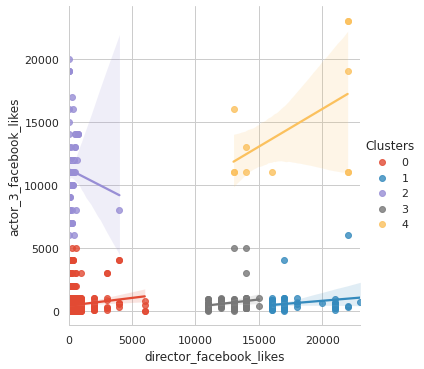

In [91]:
sns.set_style("whitegrid")
sns.lmplot("director_facebook_likes","actor_3_facebook_likes",data=df1,hue="Clusters")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


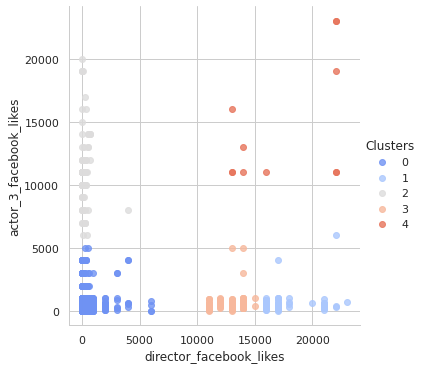

In [93]:
sns.set_style("whitegrid")
sns.lmplot("director_facebook_likes","actor_3_facebook_likes",data=df1,hue="Clusters",palette="coolwarm",aspect=1,fit_reg=False)
plt.show()